In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import GraphBib.unsafe.simpleGraph as ng

## Das Haus vom Nikolaus 

**Die Kanten sind**
- ungerichtet
- ungewichtet

Das Problem des Eulerkreises ist **zuvor** gelöst worden. Dann 
bekommen die Kanten also eine Nummer entsprechend der Rundreise.


In [8]:
HDN = ng.simpleGraph()
HDN.fuegeKanteHinzu('A', 'B', nr = 1)
HDN.fuegeKanteHinzu('B', 'C', nr = 2)
HDN.fuegeKanteHinzu('C', 'E', nr = 3)
HDN.fuegeKanteHinzu('E', 'D', nr = 4)
HDN.fuegeKanteHinzu('D', 'C', nr = 5)
HDN.fuegeKanteHinzu('C', 'A', nr = 6)
HDN.fuegeKanteHinzu('A', 'D', nr = 7)
HDN.fuegeKanteHinzu('D', 'B', nr = 8)

In [9]:
for n, nbrsdict in HDN.adjacency():
    print("Knoten:" + str(n))
    nr = 1
    for nbr, eattr in nbrsdict.items():
        print(f'{nr}: {n} --> {nbr} hat Attribu(e) {eattr}')
        nr += 1
    print("-----")

Knoten:A
1: A --> B hat Attribu(e) {'nr': 1}
2: A --> C hat Attribu(e) {'nr': 6}
3: A --> D hat Attribu(e) {'nr': 7}
-----
Knoten:B
1: B --> A hat Attribu(e) {'nr': 1}
2: B --> C hat Attribu(e) {'nr': 2}
3: B --> D hat Attribu(e) {'nr': 8}
-----
Knoten:C
1: C --> B hat Attribu(e) {'nr': 2}
2: C --> E hat Attribu(e) {'nr': 3}
3: C --> D hat Attribu(e) {'nr': 5}
4: C --> A hat Attribu(e) {'nr': 6}
-----
Knoten:E
1: E --> C hat Attribu(e) {'nr': 3}
2: E --> D hat Attribu(e) {'nr': 4}
-----
Knoten:D
1: D --> E hat Attribu(e) {'nr': 4}
2: D --> C hat Attribu(e) {'nr': 5}
3: D --> A hat Attribu(e) {'nr': 7}
4: D --> B hat Attribu(e) {'nr': 8}
-----


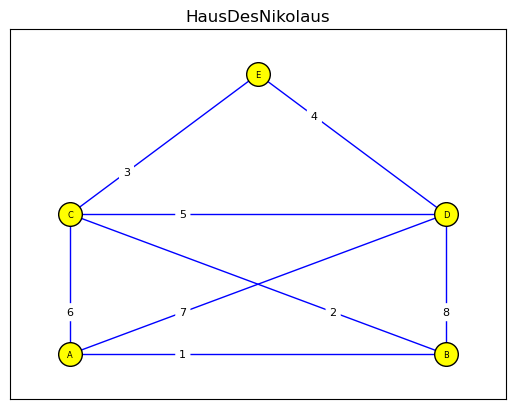

In [10]:
# explicitly set positions
pos = {'A' : (0, 0), 
       'B' : (1, 0), 
       'D' : (1, 1), 
       'C' : (0, 1), 
       'E' : (0.5, 2)}
      
kantenNamen = {(s,z):HDN.getKantenAttribut(s,z,"nr") for (s,z) in HDN.alleKanten()}

node_options = {
    "node_color": "yellow",
    "edgecolors": "black",
    "node_size": 290,
}

edge_options = {
    "edge_color": "blue",
}

node_label_options = {
    "font_size": 6, 
}

edge_label_options = {
    "font_size": 8, 
    "font_color" : "black",
    "label_pos" : 0.7,
    "edge_labels" : kantenNamen,
    "rotate" : False,
}

# nodes:
nx.draw_networkx_nodes(HDN, pos, **node_options)

# edges:
nx.draw_networkx_edges(HDN, pos, **edge_options)

# node_labels:
nx.draw_networkx_labels(HDN, pos, **node_label_options)

# edge_labels:
nx.draw_networkx_edge_labels(HDN, pos, **edge_label_options)

ax = plt.gca()
ax.set_title("HausDesNikolaus")

ax.margins(0.1)
plt.axis("on")
plt.show()

In [11]:
kanten = HDN.alleKanten()
# suche startknoten:
for kante in kanten:
    e1, e2 = kante
    nr = HDN.getKantenAttribut(e1, e2,'nr')
    if nr == 1:
        start = e1
        break

ausgabe = str(start)
anfang = start

i = 1
while i <= 8:
    # suche nächste kante
    for kante in kanten:
        e1, e2 = kante
        nr = HDN.getKantenAttribut(e1, e2,'nr')
        if nr == i:
            if e1 == anfang:
                anfang = e2
                break
            else:
                anfang = e1
                break
    ausgabe += "-" + str(anfang)
    i += 1
print(ausgabe)

A-B-C-E-D-C-A-D-B


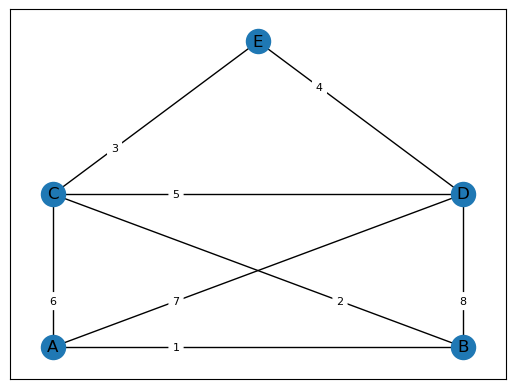

In [13]:
pos = {'A' : (0, 0), 
       'B' : (1, 0), 
       'D' : (1, 1), 
       'C' : (0, 1), 
       'E' : (0.5, 2)}

edge_label_options = {
    "font_size": 8, 
    "font_color" : "black",
    "label_pos" : 0.7,
    "edge_labels" : kantenNamen,
    "rotate" : False,
}

# nodes:
nx.draw_networkx_nodes(HDN, pos)

# edges:
nx.draw_networkx_edges(HDN, pos)

# node_labels:
nx.draw_networkx_labels(HDN, pos)

# edge_labels:
nx.draw_networkx_edge_labels(HDN, pos, **edge_label_options)
#ax = plt.gca()
#ax.set_title("HausDesNikolaus")

#ax.margins(0.1)
#plt.axis("on")
plt.show()